# 1. 读入数据
分别读入训练数据与测试数据

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

train_data = pd.read_csv('train.csv', na_values='NR')
test_data = pd.read_csv('test.csv')

train_data.head(20)

,Date,stations,observation,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,2014/1/1,station,AMB_TEMP,14.00,14.00,14.00,13.00,12.00,12.00,12.00,12.00,15.00,17.00,20.00,22.00,22.00,22.00,22.00,22.00,21.00,19.00,17.00,16.00,15.00,15.00,15.00,15.00
1,2014/1/1,station,CH4,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80
2,2014/1/1,station,CO,0.51,0.41,0.39,0.37,0.35,0.30,0.37,0.47,0.78,0.74,0.59,0.52,0.41,0.40,0.37,0.37,0.47,0.69,0.56,0.45,0.38,0.35,0.36,0.32
3,2014/1/1,station,NMHC,0.20,0.15,0.13,0.12,0.11,0.06,0.10,0.13,0.26,0.23,0.20,0.18,0.12,0.11,0.10,0.13,0.14,0.23,0.18,0.12,0.10,0.09,0.10,0.08
4,2014/1/1,station,NO,0.90,0.60,0.50,1.70,1.80,1.50,1.90,2.20,6.60,7.90,4.20,2.90,3.40,3.00,2.50,2.20,2.50,2.30,2.10,1.90,1.50,1.60,1.80,1.50
5,2014/1/1,station,NO2,16.00,9.20,8.20,6.90,6.80,3.80,6.90,7.80,15.00,21.00,14.00,11.00,14.00,12.00,11.00,11.00,22.00,28.00,19.00,12.00,8.10,7.00,6.90,6.00
6,2014/1/1,station,NOx,17.00,9.80,8.70,8.60,8.50,5.30,8.80,9.90,22.00,29.00,18.00,14.00,17.00,15.00,14.00,13.00,25.00,30.00,21.00,13.00,9.70,8.60,8.70,7.50
7,2014/1/1,station,O3,16.00,30.00,27.00,23.00,24.00,28.00,24.00,22.00,21.00,29.00,44.00,58.00,50.00,57.00,65.00,64.00,51.00,34.00,33.00,34.00,37.00,38.00,38.00,36.00
8,2014/1/1,station,PM10,56.00,50.00,48.00,35.00,25.00,12.00,4.00,2.00,11.00,38.00,56.00,64.00,56.00,57.00,52.00,51.00,66.00,85.00,85.00,63.00,46.00,36.00,42.00,42.00
9,2014/1/1,station,PM2.5,26.00,39.00,36.00,35.00,31.00,28.00,25.00,20.00,19.00,30.00,41.00,44.00,33.00,37.00,36.00,45.00,42.00,49.00,45.00,44.00,41.00,30.00,24.00,13.00


## 整理训练数据
将相同月份的数据横向连接在一起，再按10小时分割，前9个小时的data为训练x，第10个小时的pm2.5值为y

In [2]:
# 删除无用列 station
train_data.drop('stations', axis=1, inplace=True)

# 将 空值 转换成 0
train_data.fillna(0, inplace=True)

In [3]:
# 新建日期列, 分别存储年月日, 并删除原来 Date 列
train_data['year'] = pd.to_datetime(train_data['Date']).dt.year
train_data['month'] = pd.to_datetime(train_data['Date']).dt.month
train_data['day'] = pd.to_datetime(train_data['Date']).dt.day

train_data.drop('Date', axis=1, inplace=True)

# 设置索引
train_data2 = train_data.set_index(['year', 'month', 'day', 'observation'])

# 按天解压矩阵
train_data2 = train_data2.stack().unstack(level='day').unstack()

train_data2.head()

day                        1                                                                                                                                                                       2                                                                                                                                                                       3                                                                                                                                                                      4                                                                                                                                                                       5                                                                                                                                                                     6                                                                                                                                 \
                            0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23      0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23      0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18    19     20     21     22     23      0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18     19     20     21     22     23      0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17    18     19    20     21     22     23      0      1      2      3      4      5      6      7      8      9     10     11     12     13     14     15     16     17     18   
year month observation                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
2014 1     AMB_TEMP     14.00  14.00  14.00  13.00  12.00  12.00  12.00  12.00  15.00  17.00  20.00  22.00  22.00  22.00  22.00  22.00  21.00  19.00  17.00  16.00  15.00  15.00  15.00  15.00  16.00  15.00  15.00  14.00  14.00  15.00  16.00  16.00  17.00  20.00  22.00  23.00  24.00  24.00  24.00  24.00  23.00  21.00  20.00  19.00  18.00  18.00  18.00  18.00  18.00  18.00  18.00  18.00  18.00  18.00  18.00  19.00  19.00  20.00  22.00  23.00  24.00  24.00  24.00  22.00  22.00  21.00  20.00  20.0  20.00  20.00  20.00  19.00  19.00  18.00  18.00  17.00  17.00  16.00  17.00  17.00  18.00  18.00  19.00  19.00  19.00  20.00  19.00  18.00  18.00  16.00  16.00  15.00  15.00  15.00  14.00  13.00  13.00  12.00  13.00  12.00  12.00  12.00  12.00  13.00  14.00  16.00  18.00  19.00  20.00  21.00  21.00  20.00  19.00  17.00  16.0  16.00  15.0  14.00  14.00  13.00  13.00  13.00  13.00  14.00  14.00  15.00  14.00  14.00  16.00  16.00  18.00  19.00  17.00  20.00  20.00  19.00  18.00  17.00  16.00   
           CH4  

至此我们就构建好了一个完整的矩阵, 每一行都是表示对应月份对应指标的从1日0点~20日23点的数据. 通过这个数据, 训练时我们只需要在任意地方截出10个小时, 用前9个小时的数据作为x, 第10个小时的pm2.5作为y即可.

# 2. 构建特征
## 2.1. 简单版
我们在这个版本中只用pm2.5作为训练和预测, 也就是其他指标我们先暂时不用, 看看能得出什么结果

In [4]:
train_x = []
train_y = []

# 按月分组, 再按天进行拼接
for m in range(1, 13):
    this_month = train_data2.loc[(slice(None), m, 'PM2.5'), :]
    length = this_month.shape[1]
    for i in range(length - 10):
        this_x = this_month.iloc[:, i:i+9]
        this_y = this_month.loc[(slice(None), slice(None), 'PM2.5'), :].iloc[:, i + 10]
        
        train_x.append(this_x.unstack().values)
        train_y.append(this_y.values)

train_x = np.array(train_x)
train_y = np.array(train_y)
train_x = train_x.reshape((train_x.shape[0], -1))
train_y = train_y.reshape((train_y.shape[0]))
print(train_x.shape)
print(train_y.shape)

(5640, 9)
(5640,)


In [5]:
# 加入偏置项
train_x = np.insert(train_x, 0, values=1, axis=1)
print(train_x.shape)

(5640, 10)


# 3. 构建回归模型
构建回归模型, 进行梯度下降求解

In [63]:
def compute_cost(X, y, theta): 
    m = len(y) 
    diff = X.dot(theta) - y 
    J = 1.0 / (2 * m) * diff.T.dot(diff)
    return J

def gradient_descent(X, y, theta, alpha, num_iters): 
    m = len(y) 
    J_history = np.zeros(num_iters) 
    for i in range(num_iters): 
        theta -= alpha / m * ((X.dot(theta) - y).T.dot(X)) 
        J_history[i] = compute_cost(X, y, theta) 
#         print(i, J_history[i])
    return theta, J_history

In [76]:
M, N = train_x.shape
w = np.random.randn(N)
lr = 1e-4
n_iter = 6000

compute_cost(train_x, train_y, w)
w, loss = gradient_descent(train_x, train_y, w, lr, n_iter)

Error:  41.726557655862685


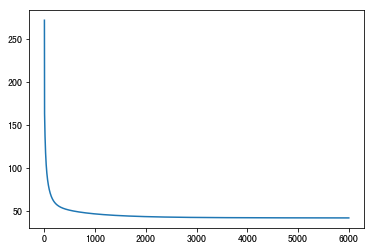

In [79]:
print("Error: ", loss[-1])
plt.plot(loss)

模型误差最终收敛在41.7左右, 下面看看在测试集的的效果

In [98]:
# 对测试集进行同样的处理
test_data = pd.read_csv('test.csv', header=None, na_values='NR')
answer = pd.read_csv('answer.csv')

# test_data.set_index([0,1], inplace=True)
test_data.head()
# answer.head()

,0,1,2,3,4,5,6,7,8,9,10
0,id_0,AMB_TEMP,15.00,14.00,14.00,13.00,13.00,13.00,13.00,13.00,12.00
1,id_0,CH4,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80,1.80
2,id_0,CO,0.36,0.35,0.34,0.33,0.33,0.34,0.34,0.37,0.42
3,id_0,NMHC,0.11,0.09,0.09,0.10,0.10,0.10,0.10,0.11,0.12
4,id_0,NO,0.60,0.40,0.30,0.30,0.30,0.70,0.80,0.80,0.90


In [100]:
test_x = pd.DataFrame()

for idx in test_data[0].unique():
    this_id = test_data[test_data[0] == idx]
    this_x = this_id[this_id[1] == 'PM2.5']
    test_x = test_x.append(this_x)
    
test_x = np.array(test_x.iloc[:, 2:])
test_x = np.insert(test_x, 0, values=1, axis=1)
test_x.shape

(240, 10)

In [101]:
answer.shape

(240, 2)

In [43]:
# 给定 x 和 w , 返回预测的值
def predict(x, w):
    return np.dot(x, w)

# 计算损失
def mse(y_true, y_hat):
    M = y_true.shape[0]
    return 1.0 / 2 / M * sum((y_true - y_hat)**2)

# 计算梯度
def gradient(y_true, x, w):
    M = y_true.shape[0]
    dw = 1.0 / M * x.T.dot(np.dot(x, w) - y)
    return np.linalg.norm(dw)

print(w)
print(mse(train_y, predict(train_x, w)))
print(gradient(train_y, train_x, w))

[4.31638941e+71 4.31638941e+71 4.31638941e+71 4.31638941e+71
 4.31638941e+71 4.31638941e+71 4.31638941e+71 4.31638941e+71
 4.31638941e+71 4.31638941e+71]
5.053127259521916e+147
7.778223755638183e+75


In [48]:
M, N = train_x.shape
w = np.random.randn(N)
lr = 1e-6
n_iter = 1000

loss = []

for i in range(n_iter):
    lr_i = lr / np.sqrt(i + 1)
    loss.append(mse(train_y, predict(train_x, w)))
    dw = gradient(train_y, train_x, w)
    w -= lr_i * dw    

# plt.plot(range(n_iter), loss)
# loss

In [50]:
loss

[1486.532390169484,
 2004.9399228986103,
 2503.125178819094,
 3014.450858543311,
 3550.6125212910483,
 4117.871351009207,
 4720.477524937125,
 5361.784268495564,
 6044.704239117571,
 6771.926355143711,
 7546.030326475966,
 8369.552291454418,
 9245.025026651461,
 10175.004035820424,
 11162.085374702274,
 12208.918428858164,
 13318.215499777512,
 14492.759313901226,
 15735.40914817667,
 17049.106017127193,
 18436.877214663407,
 19901.840408518176,
 21447.207423740707,
 23076.28781116048,
 24792.49226947315,
 26599.33597091244,
 28500.4418274505,
 30499.543725260977,
 32600.489748573527,
 34807.24540925253,
 37123.896894908496,
 39554.654345740884,
 42103.85516834641,
 44775.96739325298,
 47575.5930818057,
 50507.4717871745,
 53576.48407357494,
 56787.65509729428,
 60146.15825268672,
 63657.31888601453,
 67326.61807974328,
 71159.6965097155,
 75162.35837748052,
 79340.57541992686,
 83700.490998287,
 88248.42426849973,
 92990.87443487436,
 97934.52508895416,
 103086.2486354454,
 108453.110

In [27]:
M, N = train_x.shape
w = np.random.randn(N)
train_x.dot(w)

array([-21.82658498, -41.22905983, -51.09187487, ..., -42.18690354,
       -20.88269669, -13.21161676])